In [29]:
import arviz as az
import numpy as np
import json
import matplotlib.pyplot as plt

In [19]:
# load output from fitted model
az_fit = az.from_json("model_output/model_2_hurdle_2500_samples_4_chains.json")

In [20]:
az_fit

Inference data with groups:
	> posterior
	> posterior_predictive
	> predictions
	> sample_stats
	> observed_data

In [21]:
# load y_test values to evaluate model predictions on unseen x_test data
with open('model_output/y_test_model_2_hurdle_2500_samples_4_chains.json') as f:
    y_test = f.read()
y_test = np.asarray(json.loads(y_test))
print(y_test.shape)

(3091,)


In [35]:
print(f'y_pred shape: ',az_fit.predictions.y_pred.to_numpy().shape)
y_pred = az_fit.predictions.y_pred.to_numpy()

y_pred shape:  (4, 2500, 3091)


Text(0.5, 1.0, 'y_pred (chain 1, sample 1)')

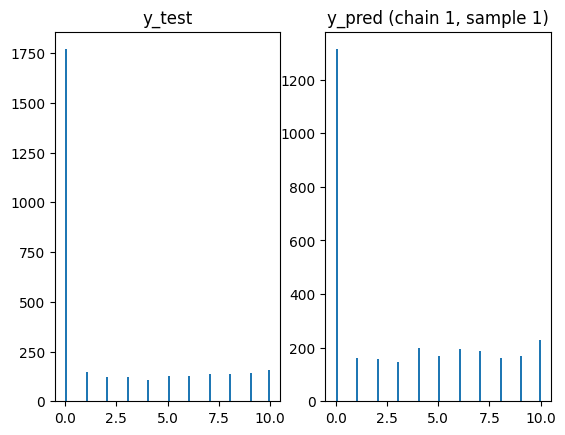

In [34]:
pltL = plt.subplot(1,2,1); pltR = plt.subplot(1,2,2)
pltL.hist(y_test,bins=100)
pltL.set_title('y_test')
pltR.hist(y_pred[0,0,:],bins=100)
pltR.set_title('y_pred (chain 1, sample 1)')


In [38]:
# treat each chain independently, and for each chain average prediction accuracies across the 2500 samples

chain_acc = []
for ci in range(y_pred.shape[0]):   # loop chains
    acc = 0
    for si in range(y_pred.shape[1]):   # loop samples
        acc += np.where(y_pred[ci,si,:] == y_test, True, False).sum() / y_test.shape[0]
    chain_acc.append(acc/y_pred.shape[1])
    
print(f'mean accuracy in each chain: ',chain_acc)

mean accuracy in each chain:  [0.27223422840504763, 0.27192688450339786, 0.2721754771918475, 0.2721735360724701]
